<a href="https://colab.research.google.com/github/rvoljanin/neuraluniversity/blob/master/notebooks/ai/exercise3/exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 

# LIGHT Вариант 2

In [2]:
#Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

#Меняем формат данных MNIST
#Надо добавить в конце размерность 1
#Чтобы свёрточная сеть понимала, что это чёрно-белые данные
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [18]:
print(x_test.shape)

(10000, 28, 28, 1)


In [7]:
def modelCreate(neuro_num=32,act_func='relu'):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(neuro_num, (3, 3), padding='same', activation=act_func))
    model.add(Conv2D(neuro_num, (3, 3), padding='same', activation=act_func))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

In [9]:
def modelPlot(history):
    plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.show()

In [11]:
# Таблица результатов
results = {'neiro_num': {2:[], 4:[], 16:[], 32:[]}, 'act_func': {'relu':[], 'linear': []}, 'batch': {10:[], 100:[], 128:[], 48000:[]}}

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.5539 - accuracy: 0.8287 - val_loss: 0.2106 - val_accuracy: 0.9367
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2739 - accuracy: 0.9121 - val_loss: 0.1528 - val_accuracy: 0.9560
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2254 - accuracy: 0.9279 - val_loss: 0.1230 - val_accuracy: 0.9622
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1974 - accuracy: 0.9363 - val_loss: 0.1105 - val_accuracy: 0.9664
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1787 - accuracy: 0.9434 - val_loss: 0.1038 - val_accuracy: 0.9681
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1661 - accuracy: 0.9460 - val_loss: 0.0996 - val_accuracy: 0.9679
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1567 - accuracy: 0.9498 - val_loss: 0.0964 - val_accuracy: 0.9694
Epoch 

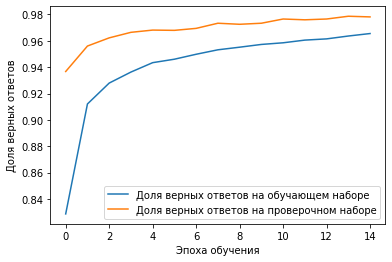

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3389 - accuracy: 0.8975 - val_loss: 0.1012 - val_accuracy: 0.9677
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1335 - accuracy: 0.9571 - val_loss: 0.0688 - val_accuracy: 0.9764
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1016 - accuracy: 0.9669 - val_loss: 0.0568 - val_accuracy: 0.9810
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0843 - accuracy: 0.9726 - val_loss: 0.0492 - val_accuracy: 0.9836
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0759 - accuracy: 0.9748 - val_loss: 0.0423 - val_accuracy: 0.9858
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0666 - accuracy: 0.9782 - val_loss: 0.0468 - val_accuracy: 0.9839
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0589 - accuracy: 0.9808 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 

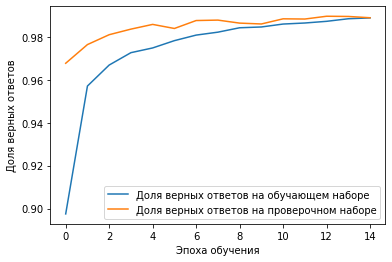

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1805 - accuracy: 0.9449 - val_loss: 0.0484 - val_accuracy: 0.9846
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0613 - accuracy: 0.9810 - val_loss: 0.0361 - val_accuracy: 0.9883
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.0306 - val_accuracy: 0.9897
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0292 - val_accuracy: 0.9900
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0297 - val_accuracy: 0.9898
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0278 - val_accuracy: 0.9909
Epoch 

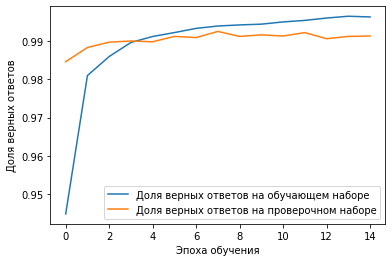

Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1644 - accuracy: 0.9493 - val_loss: 0.0436 - val_accuracy: 0.9849
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0312 - val_accuracy: 0.9894
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0351 - val_accuracy: 0.9900
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0287 - val_accuracy: 0.9905
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0270 - val_accuracy: 0.9921
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0313 - val_accuracy: 0.9905
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0289 - val_accuracy: 0.9929
Epoch 

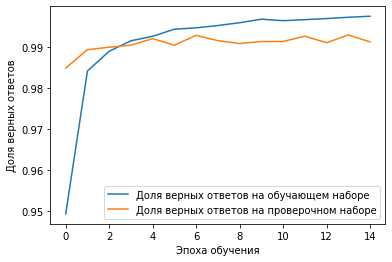

In [13]:
for n in results['neiro_num'].keys():
    model = modelCreate(neuro_num=n)
    batch_size = 128
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=15, validation_data=(x_test, y_test), verbose=1)
    modelPlot(history)
    ac = round(float(str(history.history['accuracy'][-1])),4)
    val = round(float(str(history.history['val_accuracy'][-1])),4)
    results['neiro_num'][n].append((n,'relu',batch_size))
    results['neiro_num'][n].append((ac,val))


Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1577 - accuracy: 0.9509 - val_loss: 0.0433 - val_accuracy: 0.9859
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0362 - val_accuracy: 0.9873
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0310 - val_accuracy: 0.9903
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0298 - val_accuracy: 0.9908
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0312 - val_accuracy: 0.9904
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0.0298 - val_accuracy: 0.9911
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0314 - val_accuracy: 0.9910
Epoch 

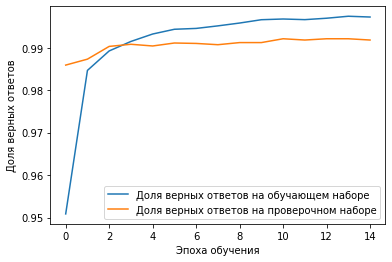

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1889 - accuracy: 0.9420 - val_loss: 0.0746 - val_accuracy: 0.9764
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0683 - accuracy: 0.9789 - val_loss: 0.0537 - val_accuracy: 0.9825
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0495 - accuracy: 0.9838 - val_loss: 0.0471 - val_accuracy: 0.9857
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 0.0421 - val_accuracy: 0.9881
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0317 - accuracy: 0.9893 - val_loss: 0.0543 - val_accuracy: 0.9845
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0274 - accuracy: 0.9907 - val_loss: 0.0470 - val_accuracy: 0.9868
Epoch 7/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.0535 - val_accuracy: 0.9861
Epoch 

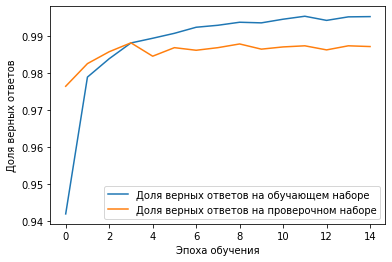

In [15]:
for n in results['act_func'].keys():
    model = modelCreate(act_func=n)
    batch_size = 128
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=15, validation_data=(x_test, y_test), verbose=1)
    modelPlot(history)
    ac = round(float(str(history.history['accuracy'][-1])),4)
    val = round(float(str(history.history['val_accuracy'][-1])),4)
    results['act_func'][n].append((32,n,batch_size))
    results['act_func'][n].append((ac,val))

Epoch 1/15
6000/6000 [==============================] - 25s 4ms/step - loss: 0.1236 - accuracy: 0.9619 - val_loss: 0.0406 - val_accuracy: 0.9865
Epoch 2/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0544 - accuracy: 0.9834 - val_loss: 0.0308 - val_accuracy: 0.9900
Epoch 3/15
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0287 - val_accuracy: 0.9908
Epoch 4/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0296 - accuracy: 0.9911 - val_loss: 0.0266 - val_accuracy: 0.9918
Epoch 5/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0315 - val_accuracy: 0.9903
Epoch 6/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0305 - val_accuracy: 0.9910
Epoch 7/15
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0279 - val_ac

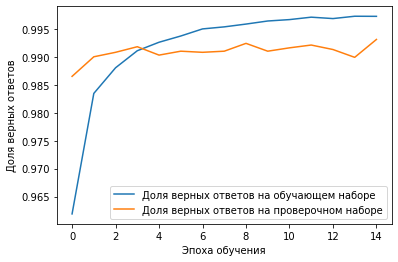

Epoch 1/15
600/600 [==============================] - 3s 5ms/step - loss: 0.1532 - accuracy: 0.9531 - val_loss: 0.0506 - val_accuracy: 0.9832
Epoch 2/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0374 - val_accuracy: 0.9876
Epoch 3/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0321 - val_accuracy: 0.9888
Epoch 4/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 5/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0276 - val_accuracy: 0.9906
Epoch 6/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0276 - val_accuracy: 0.9917
Epoch 7/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0270 - val_accuracy: 0.9909
Epoch 

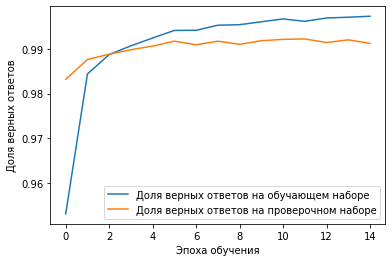

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1733 - accuracy: 0.9476 - val_loss: 0.0502 - val_accuracy: 0.9828
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0548 - accuracy: 0.9836 - val_loss: 0.0332 - val_accuracy: 0.9895
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0288 - accuracy: 0.9904 - val_loss: 0.0286 - val_accuracy: 0.9907
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0262 - val_accuracy: 0.9909
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0294 - val_accuracy: 0.9917
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0294 - val_accuracy: 0.9909
Epoch 

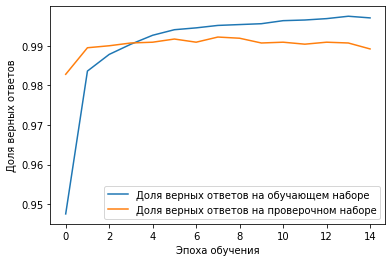

Epoch 1/15


ResourceExhaustedError:  OOM when allocating tensor with shape[48000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_12/conv2d_25/Relu (defined at <ipython-input-19-60d7a462cc11>:4) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_462888]

Function call stack:
train_function


In [19]:
for n in results['batch'].keys():
    model = modelCreate()
    batch_size = n
    try:
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=15, validation_data=(x_test, y_test), verbose=1)
        modelPlot(history)
        ac = round(float(str(history.history['accuracy'][-1])),4)
        val = round(float(str(history.history['val_accuracy'][-1])),4)
    except:
        ac = 0
        val = 0
    results['batch'][n].append((32,'relu',batch_size))
    results['batch'][n].append((ac,val))

In [20]:
print(results)

{'neiro_num': {2: [(2, 'relu', 128), (0.9655, 0.9781)], 4: [(4, 'relu', 128), (0.9888, 0.9889)], 16: [(16, 'relu', 128), (0.9963, 0.9913)], 32: [(32, 'relu', 128), (0.9976, 0.9913)]}, 'act_func': {'relu': [(32, 'relu', 128), (0.9972, 0.9918)], 'linear': [(32, 'linear', 128), (0.9952, 0.9871)]}, 'batch': {10: [(32, 'relu', 10), (0.9972, 0.9931)], 100: [(32, 'relu', 100), (0.9973, 0.9912)], 128: [(32, 'relu', 128), (0.997, 0.9892)], 48000: []}}
